<a href="https://www.kaggle.com/code/sujithcharan/women-safety?scriptVersionId=195195448" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crimes-against-women-in-india-2001-2021/CrimesOnWomenData.csv
/kaggle/input/crimes-against-women-in-india-2001-2021/description.csv


In [2]:
data = pd.read_csv("/kaggle/input/crimes-against-women-in-india-2001-2021/CrimesOnWomenData.csv")
# data
warnings.filterwarnings('ignore')
data.columns

Index(['Unnamed: 0', 'State', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV',
       'WT'],
      dtype='object')

In [3]:
data = data.drop(columns=["Unnamed: 0"])


In [4]:
data

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,ASSAM,2001,817,1070,59,850,4,1248,0
3,BIHAR,2001,888,518,859,562,21,1558,83
4,CHHATTISGARH,2001,959,171,70,1763,161,840,0
...,...,...,...,...,...,...,...,...,...
731,D&N Haveli,2021,1250,4083,141,2068,417,4731,4
732,Daman & Diu,2021,315,904,16,1851,10,501,1
733,Delhi UT,2021,2,1,0,5,1,9,0
734,Lakshadweep,2021,0,0,0,1,1,3,0


In [5]:
data.describe()

,Year,Rape,K&A,DD,AoW,AoM,DV,WT
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,2011.149457,727.855978,1134.542120,215.692935,1579.115489,332.722826,2595.078804,28.744565
std,6.053453,977.024945,1993.536828,424.927334,2463.962518,806.024551,4042.004953,79.999660
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,35.000000,24.750000,1.000000,34.000000,3.000000,13.000000,0.000000
50%,2011.000000,348.500000,290.000000,29.000000,387.500000,31.000000,678.500000,0.000000
75%,2016.000000,1069.000000,1216.000000,259.000000,2122.250000,277.500000,3545.000000,15.000000
max,2021.000000,6337.000000,15381.000000,2524.000000,14853.000000,9422.000000,23278.000000,549.000000


In [6]:
data.isnull().sum()

State    0
Year     0
Rape     0
K&A      0
DD       0
AoW      0
AoM      0
DV       0
WT       0
dtype: int64

<Axes: title={'center': 'Num Of Missing Value'}>

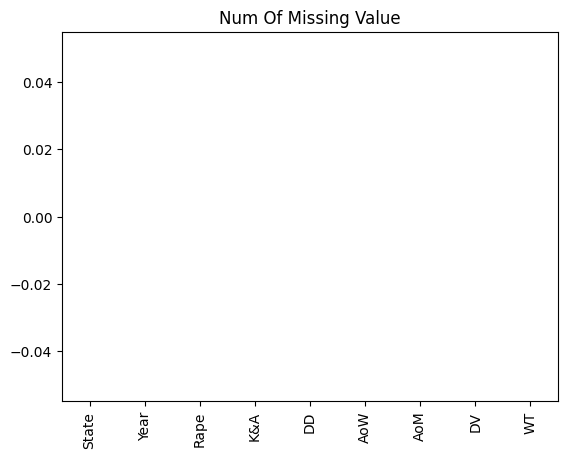

In [7]:
data.isnull().sum().plot(kind='bar', title='Num Of Missing Value')

In [8]:
data["State"] = data["State"].str.upper()


This command converts all the values in the State column of the DataFrame data to uppercase, ensuring consistency in state names.


**DATA CLEANING AND FORMATING**


In [9]:
data["State"] = data["State"].replace("D & N HAVELI","D&N HAVELI")

In [10]:
unique_states = data['State'].unique()
unique_states_list = unique_states.tolist()
unique_states

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D&N HAVELI',
       'DAMAN & DIU', 'LAKSHADWEEP', 'PUDUCHERRY', 'TELANGANA',
       'DELHI UT'], dtype=object)

**UNSAFE for working independent women**


In [11]:
state_grouped = data.groupby('State')['Rape'].sum().reset_index()
top_10_states = state_grouped.nlargest(10, 'Rape')
rape = pd.DataFrame(top_10_states)
print(rape)

             State   Rape
19  MADHYA PRADESH  72808
33   UTTAR PRADESH  45694
28       RAJASTHAN  43799
20     MAHARASHTRA  39252
3            ASSAM  32190
35     WEST BENGAL  29486
6     CHHATTISGARH  25178
25          ODISHA  24810
17          KERALA  24184
1   ANDHRA PRADESH  23424


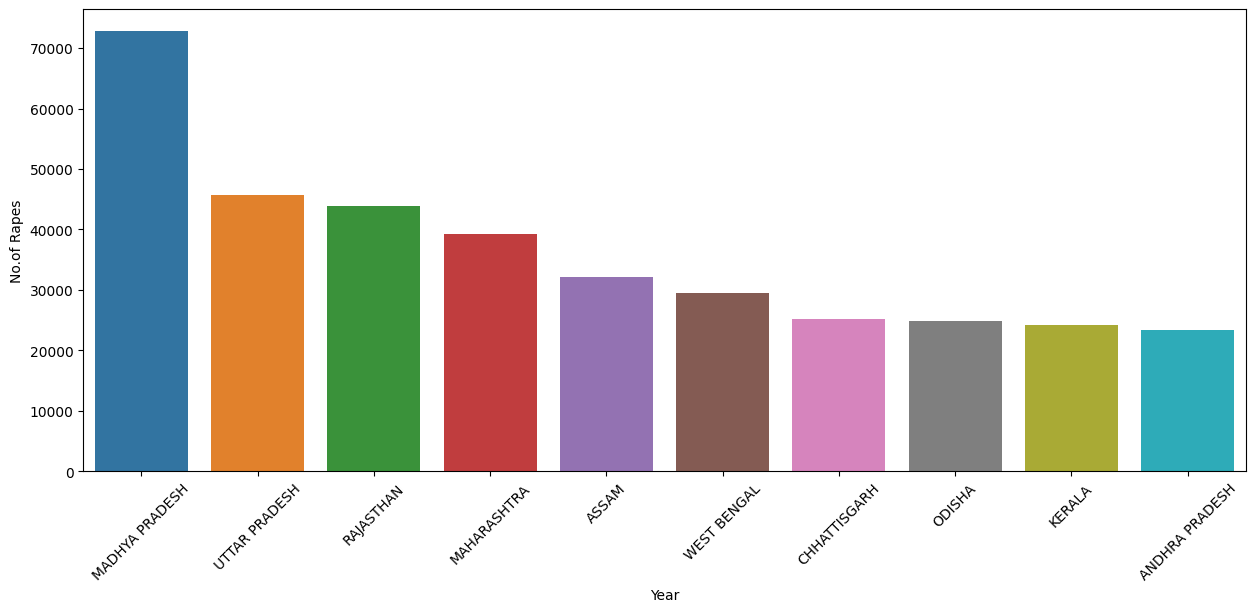

In [12]:
plt.figure(figsize = (15,6))
sns.barplot(x = rape["State"], y =rape["Rape"])
plt.xlabel('Year')
plt.ylabel('No.of Rapes')
plt.xticks(rotation=45)
plt.show()

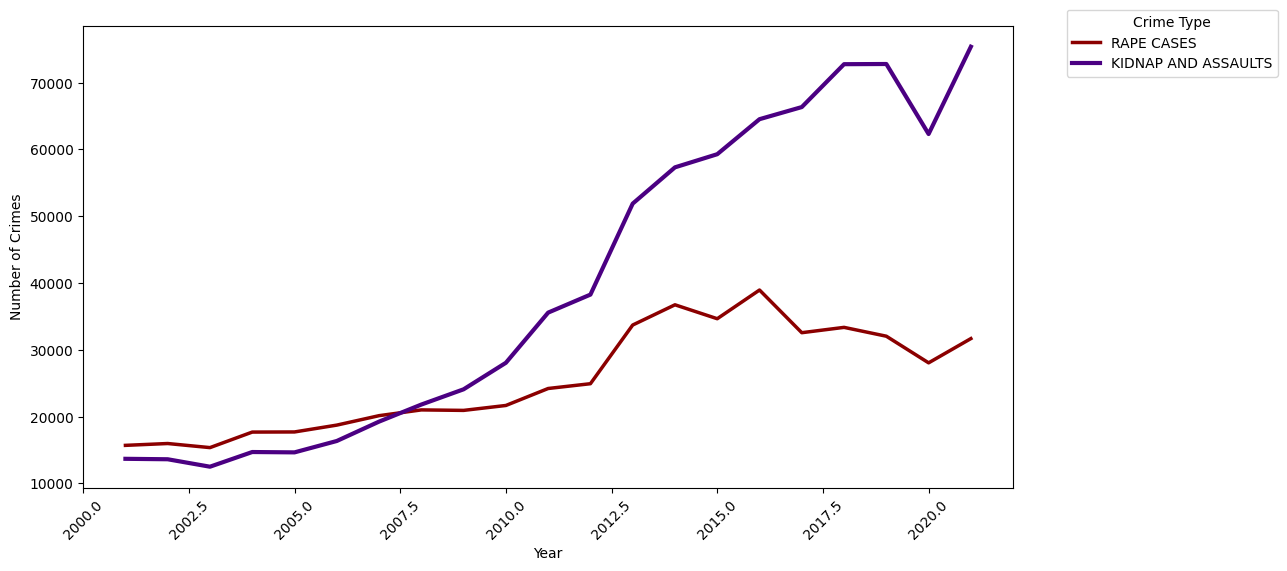

In [13]:
rape_trend = data.groupby("Year")["Rape"].sum().reset_index()
KA_trend = data.groupby("Year")["K&A"].sum().reset_index()
plt.figure(figsize = (12,6))
sns.lineplot(x = "Year", y = "Rape",data = rape_trend,color="darkred",linewidth = 2.5,dashes = False,label = "RAPE CASES")
sns.lineplot(x = "Year", y ="K&A",data = KA_trend,color="indigo",linewidth = 3 ,dashes = False,label = "KIDNAP AND ASSAULTS")
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1.05))
plt.show()

***MINORS SAFETY***


In [14]:
AoM_Trend = data.groupby("State")["AoM"].sum().reset_index()
top_10_AMT = AoM_Trend.nlargest(10,"AoM")
top_10_AMT

,State,AoM
1,ANDHRA PRADESH,54684
33,UTTAR PRADESH,46524
20,MAHARASHTRA,30693
19,MADHYA PRADESH,21631
30,TAMIL NADU,12084
12,HARYANA,11834
17,KERALA,8873
25,ODISHA,7631
9,DELHI UT,6046
35,WEST BENGAL,5750


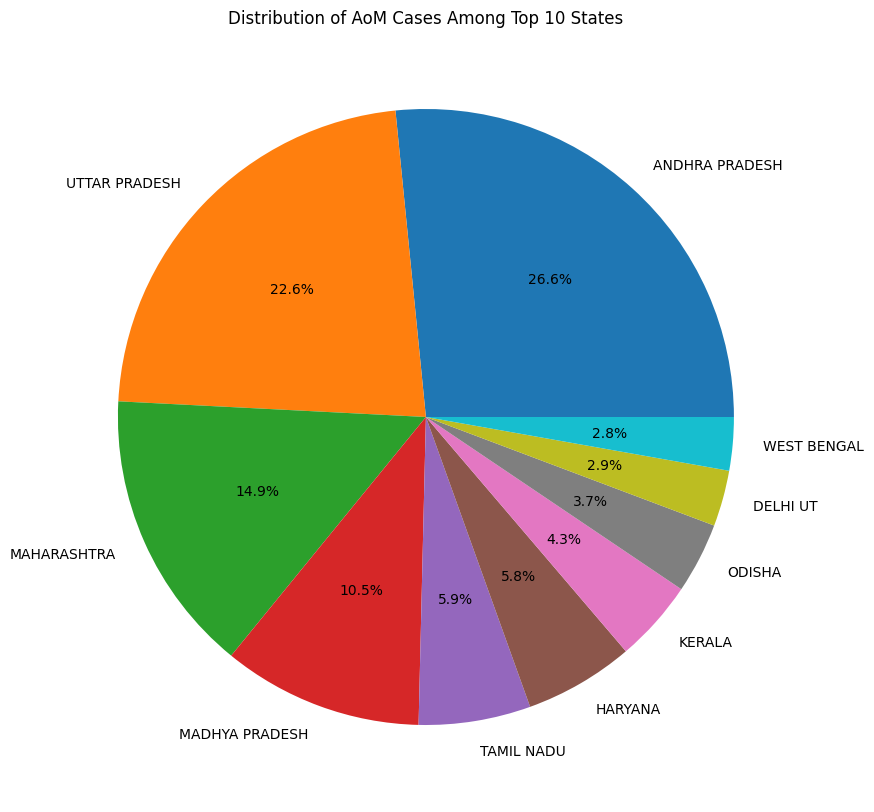

In [15]:
plt.figure(figsize=(10, 10))
plt.pie(top_10_AMT['AoM'], labels=top_10_AMT['State'], autopct='%1.1f%%')
plt.title('Distribution of AoM Cases Among Top 10 States')
plt.show()

**if we combine Dowry Deaths and Domestic violence, we will have an idea on how safe is married women in the married home**


In [16]:
DD_trend = data.groupby("Year")["DD"].sum().reset_index()
DV_trend = data.groupby("Year")["DV"].sum().reset_index()
DD_trend

,Year,DD
0,2001,6738
1,2002,6687
2,2003,6078
3,2004,6900
4,2005,6673
5,2006,7481
6,2007,7955
7,2008,8043
8,2009,8242
9,2010,8248


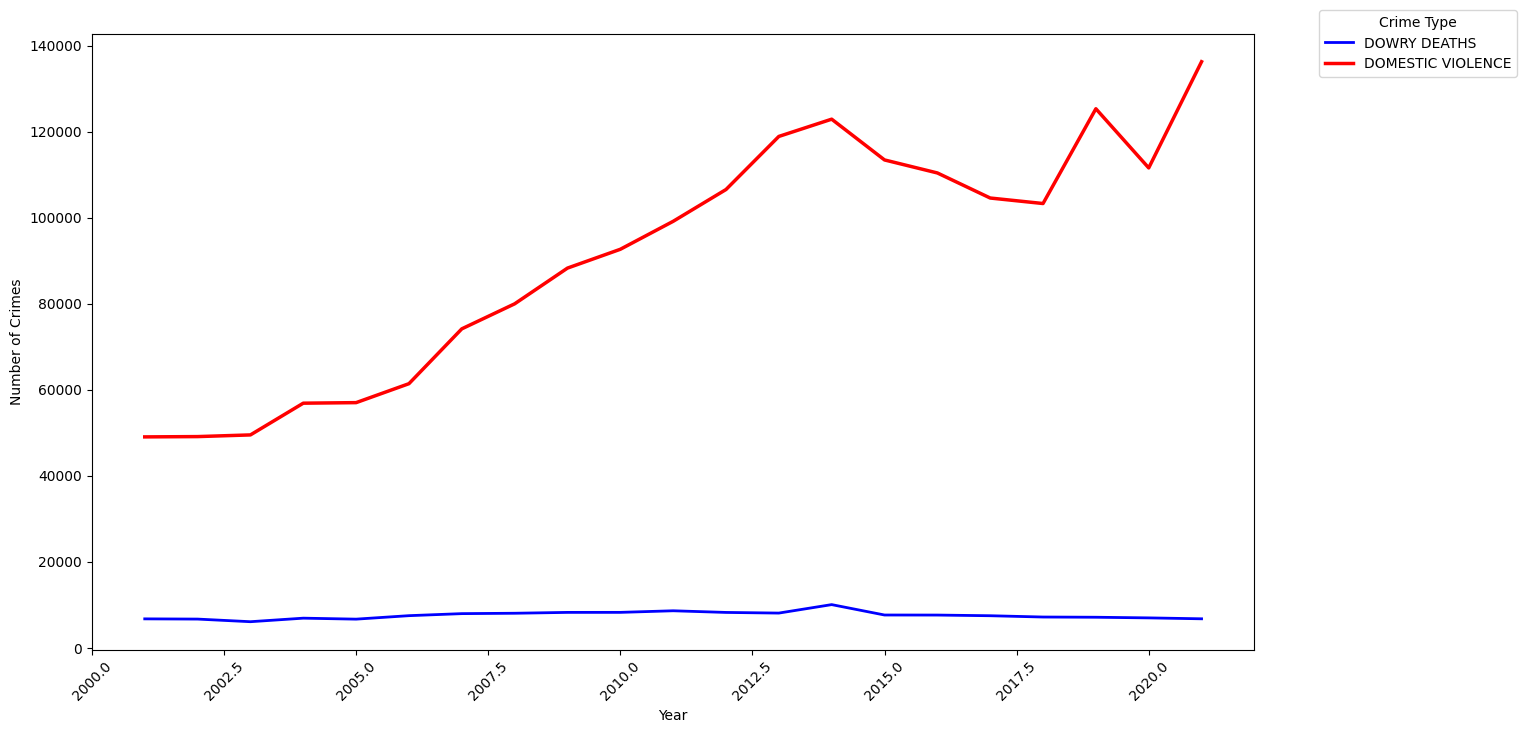

In [17]:
DD_trend = data.groupby("Year")["DD"].sum().reset_index()
DV_trend = data.groupby("Year")["DV"].sum().reset_index()
plt.figure(figsize = (15,8))
sns.lineplot(x = "Year", y = "DD",data = DD_trend,color="blue",linewidth = 2.0,dashes = False,label = "DOWRY DEATHS")
sns.lineplot(x = "Year", y = "DV",data = DV_trend,color="red",linewidth = 2.5,dashes = False, label = "DOMESTIC VIOLENCE")
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1.05))
plt.show()

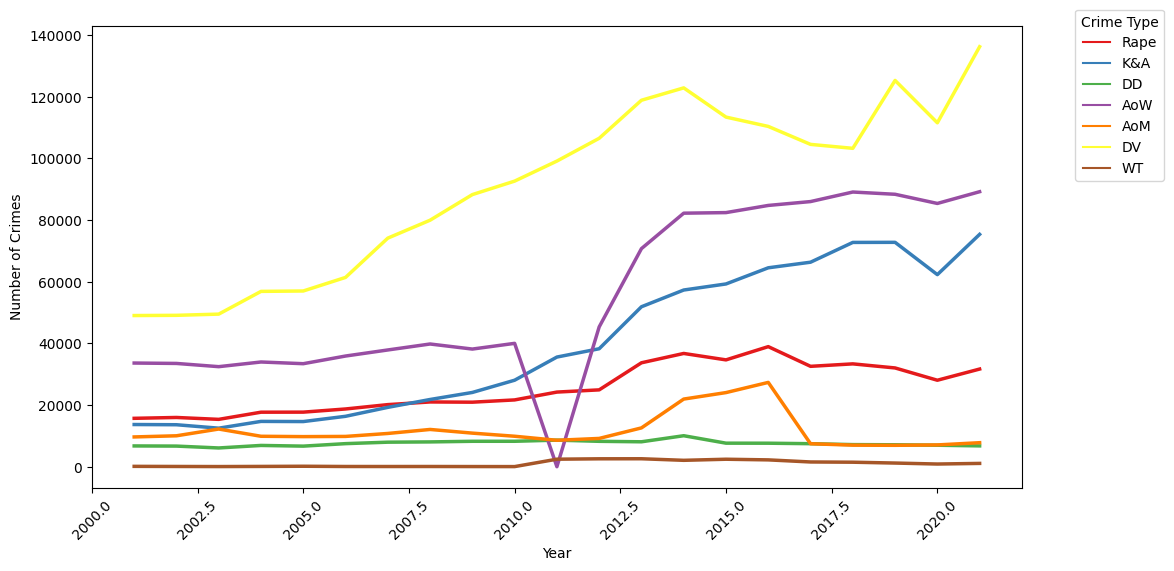

In [18]:

crime_trend = data.groupby("Year").sum()
plt.figure(figsize = (12,6))
sns.lineplot(data=crime_trend, linewidth=2.5, palette="Set1", dashes=False)
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1.05))
plt.show()

<Axes: >

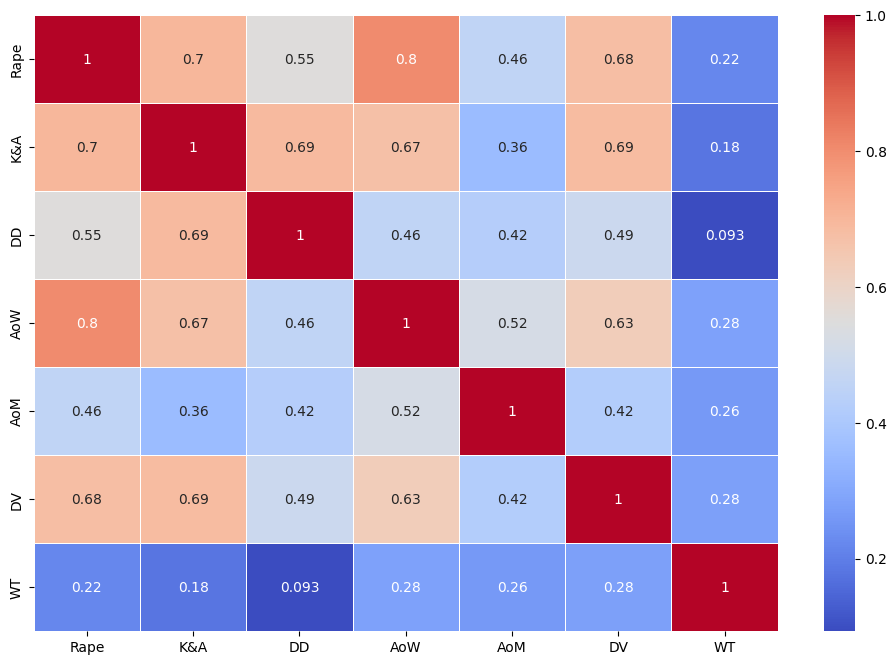

In [19]:
plt.figure(figsize = (12,8))

correlation_data = data.drop(["State","Year"],axis = 1).corr()


# correlation_data
sns.heatmap(correlation_data,annot = True,cmap = "coolwarm", linewidth = 0.5)